In [25]:
import pandas as pd
import seaborn as ans 
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data

In [26]:
submission_file = 'AssMLWithRandomForest.csv'
train_dataset = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv')
test_dataset = pd.read_csv('/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv')

# preprocessing

In [27]:
features = train_dataset.drop(['spam', 'ID'], axis=1)
labels = train_dataset['spam']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# split data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, 
                                                    labels, 
                                                    test_size=0.19, 
                                                    random_state=42)


# parameter grid

In [29]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 3, 5]
}


# Create model

In [30]:
random_forest_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid search

In [31]:
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, 
                               param_grid=param_grid, 
                               cv=5, scoring='f1', 
                               verbose=2, 
                               n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Evaluate model

In [32]:
def evaluate_model(grid_search, Xtest, y_test):
    y_pred = grid_search.best_estimator_.predict(Xtest)
    f1 = f1_score(y_test, y_pred)
    return grid_search.best_params_, f1


# Distribution of Emails: Spam vs. Non-Spam

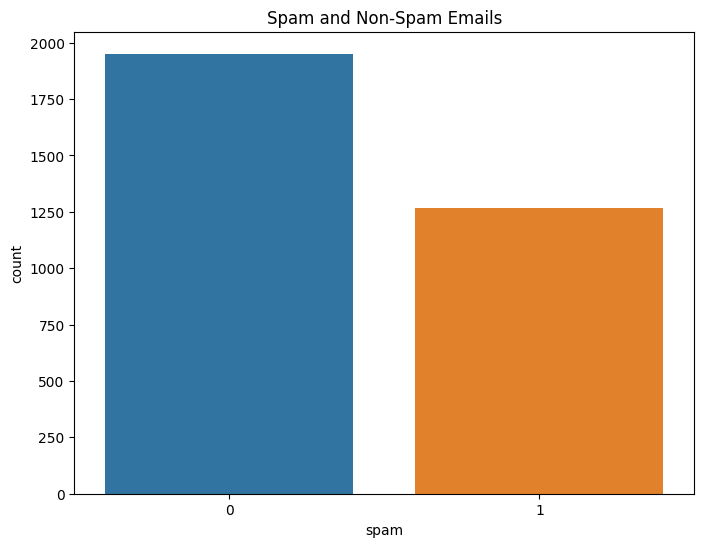

In [50]:
plt.figure(figsize=(8, 6))
ans.countplot(x='spam', data=train_dataset)
plt.title('Spam and Non-Spam Emails')
plt.show()

# Grid search
# Evaluate model

In [35]:
grid_search = perform_grid_search(random_forest_model, 
                                  param_grid, 
                                  X_train, 
                                  y_train)

# Evaluate model
best_params, f1 = evaluate_model(grid_search, X_test, y_test)
print("F1 Score on Validation Set:", f1)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] END max_

# Key Features Impacting Email Classification

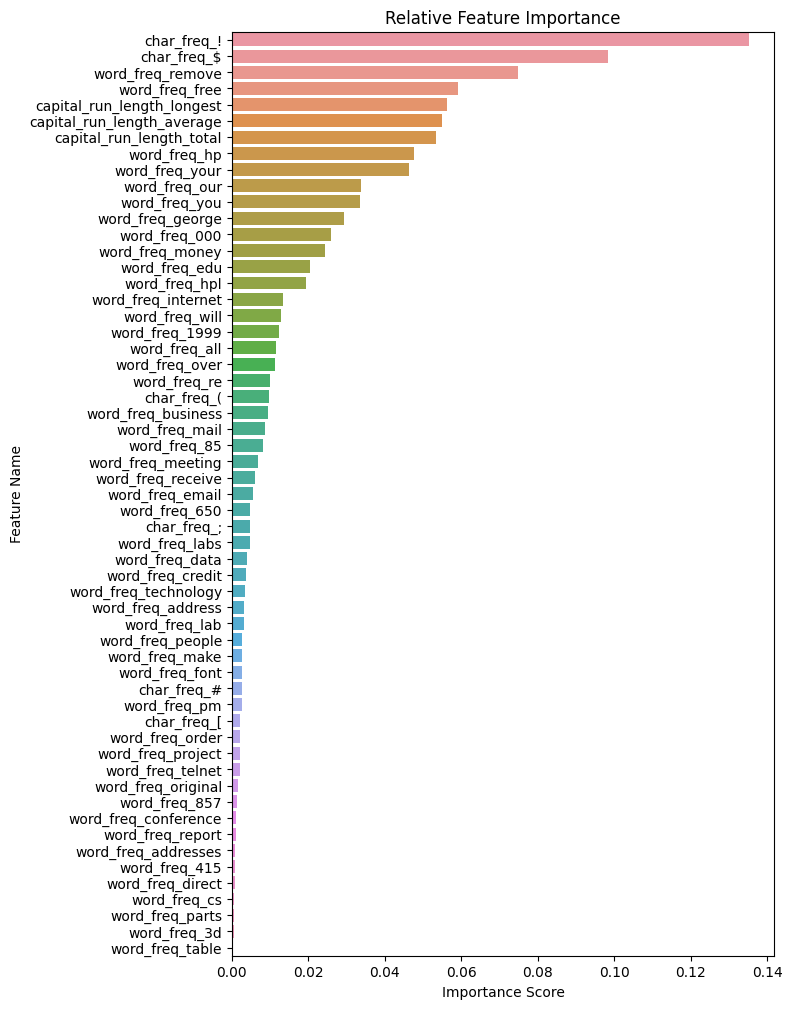

In [49]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = train_dataset.columns.drop(['spam', 'ID'])
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(7, 12))
ans.barplot(data=importance_df_sorted, x='Importance', y='Feature')
plt.title('Relative Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

# Submission

In [38]:
test_ids = test_dataset['ID']  
X_test = test_dataset.drop(['ID'], axis=1) 
X_test_scaled = scaler.transform(X_test)
test_predictions = grid_search.best_estimator_.predict(X_test_scaled)

submission_df = pd.DataFrame({'ID': test_ids, 'spam': test_predictions})
submission_df.to_csv(submission_file, index=False)